# Proyek ML Terapan 1: Predictive Analysis - Car Price
# Nama: Novianto
## Data adalah terkait dengan prediksi mobil bekas

Dari data yang akan dianalisa, pertanyaan bisnis yang diajukan adalah:
1. Tipe dan model mobil apa yang paling banyak diminati ?
2. Tipe dan model mobil apa yang memiliki harga tinggi ?
3. Faktor apa yang mempengaruhi harga mobil ?


# Deskripsi Data Penjualan Mobil


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/novianto13/ML-terapan/main/car_price_prediction.csv' # Changed URL to raw content URL
car_price_prediction = pd.read_csv(url)
car_price_prediction # Display the dataframe, assuming 'car' was intended to be 'car_price_prediction'

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
# mengganti nama data set
car = car_price_prediction

In [5]:
# Deskripsi dataset

car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Deskrisi dataset

Data menunjukkan bawah terdapat 17 kolom atau faktor dalam data set:
1. ID menunjukkan kode mobil
2. Price menunjukkan harga mobil
3. Levy menunjukkan pajak kendaraan
4. Manufacturer menunjukkan perusahaan pembuat
5. Model menunjukkan model mobil
6. Prod. Year menunjukkan tahun pembuatan
7. Category menunjukkan kelompok jenis mobil
8. Fuel type menunjukkan jenis bahan bakar yang digunakan
9. Engine volume meunjukkan ukuran volume mesin
10. Mileage menunjukkan jarak tempuh
11. Cylinders menunjukkan jumlah silinder mesin
12. Gear box menunjukkan transmisi mobil
13. drive wheels menunjukkan posisi setir
14. Doors menunjukkan jumlah pintu
15. Wheel menunjukkan jumlah roda
16. Color menunjukkan warna kendaraan
17. Airbags menunjukkan jumlah airbag dalam kendaraan

### Evaluasi dataset

Hasil dari deskripsi data tersebut menunjukkan bahwa terdapat 17 kolom atau 17 data yang di record dalam data set. Dari data set tersebut terdapat satu kolom yang jarak atau mileage dengan tipe data object, yang sebaiknya data ini adalah data angka atau int64.
Total data adalah 19.237.

Dari info tersebut diperoleh informasi bahwa semua kolom terlah berisi 19.237 data. dengan demikian dapat dipahami bahwa tidak ada data yang kosong atau hilang dalam dataset tersebut.

Selain itu, pada data doors, tipe data adalah object yang seharusnya int. Sedangkan data yang muncul adalah date.


In [6]:
# statistik deskripsi keseluruhan data

car.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


Untuk melihat secara khusus data faktor harga, maka berikut adalah deskripsi statistik untuk harga

In [7]:
# Deskripsi data untuk melihat harga mobil

price_desc = car['Price'].describe()
price_desc['count'] = int(price_desc['count']) # Ubah 'count' ke integer
price_desc.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']] = price_desc.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].astype(int) # Ubah statistik lainnya ke integer
print(price_desc)

count       19237.0
mean        18555.0
std        190581.0
min             1.0
25%          5331.0
50%         13172.0
75%         22075.0
max      26307500.0
Name: Price, dtype: float64


In [8]:
# Melihat harga mobil yang paling rendah

min_price = car['Price'].min()  # Cari nilai 'Price' terendah
lowest_price_data = car[car['Price'] == min_price]  # Filter data dengan 'Price' terendah
print(lowest_price_data)  # Tampilkan data lengkap

             ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
7815   45765530      1     -         OPEL    Astra        1999      Sedan   
16992  45772201      1  1202    CHEVROLET  Lacetti        2006  Hatchback   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
7815               Yes    Petrol           1.6  122231 km        4.0   
16992               No    Petrol           1.6  200000 km        4.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
7815         Manual        Front  04-May  Left wheel  Silver        4  
16992        Manual        Front  04-May  Left wheel   Black        2  


Dari deskripsi data tersebut dapat dipahami bahwa:
1. Rata-rata harga mobil adalah 18.555
2. Tahun mobil yang terendah adalah 1939, sedangkan yang terbaru adalah tahun 2020.
3. Dalam deskripsi data ini, terdapat data yang ekstrim pada harga, yaitu ada mobil dengan harga yang sangat jauh di atas rata-rata yaitu 26.307.500 dan terdapat harga mobil yang hanya 1.
4. Mobil dengan harga 1, ada 2 mobil yaitu opel dan chevrolet.




# Deskripsi data: memperbaiki data

## Cek nilai 0 atau kosong

In [9]:
# menunjukkan nilai nol

Price = (car.Price == 0).sum()
Levy = (car.Levy == '-').sum()
Prod_year = (car['Prod. year'] == 0).sum()

print("Nilai 0 di kolom price ada: ", Price)
print("Nilai 0 di kolom levy ada: ", Levy)
print("Nilai 0 di kolom Prod.year ada: ", Prod_year)

Nilai 0 di kolom price ada:  0
Nilai 0 di kolom levy ada:  5819
Nilai 0 di kolom Prod.year ada:  0


Informasi di atas menunjukkan bahwa tidak ada nilai 0 dalam harga dan tahun, sedangkan ada nilai - (kosong) pada faktor Lavy. Karena Levy adalah pungutan pajak kendaraan maka niali tersebut menunjukkan bahwa tidak ada pungutan atau pajak untuk kendaraan tersebut. dalam data terdapat 5819 data Levy yang tidak memiliki nilai pungutan.

## Memperbaiki tipe data

Langkah penting selanjutnya adalah memperbaiki tipe data yang tidak sesuai

In [10]:
# memperbaiki nilai mileage menjadi angka
car['Mileage'] = car['Mileage'].str.replace('km', '', regex=False).astype(int)

In [11]:
# memperbaiki nilai doors menjadi angka
car['Doors'] = car['Doors'].str.extract('(\d+)').astype(int)

In [12]:
# Replace hyphens or any non-numeric characters with NaN before converting to int
car['Levy'] = pd.to_numeric(car['Levy'], errors='coerce').fillna(0).astype('int64')

In [13]:
# mengganti tipe silinder menjadi numerik
car['Cylinders'] = car['Cylinders'].astype('int64')

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  int64 
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  int64 
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  int64 
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

Tipe data yang diperbaiki adalah mileage, levy, cylinders, dan doors, yang awalnya adalah object diganti dengan int (number).

Hasil secara keseluruhan adalah sebagai berikut

In [16]:
# deskripsi dataset setelah perbaikan

car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4,Automatic,Front,4,Left wheel,Black,4


## Mengganti nama Prod. year menjadi year

In [17]:
car = car.rename(columns={'Prod. year': 'year'})

In [18]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  int64 
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   year              19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  int64 
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  int64 
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

## Melihat nilai outlier

Langkah ini akan mengevaluasi adanya data outlier

<Axes: xlabel='Price'>

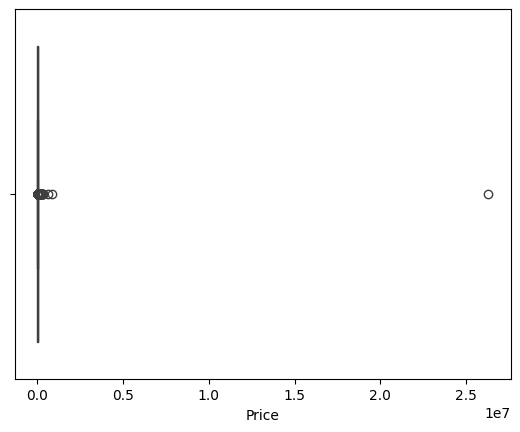

In [19]:
sns.boxplot(x=car['Price'])


<Axes: xlabel='year'>

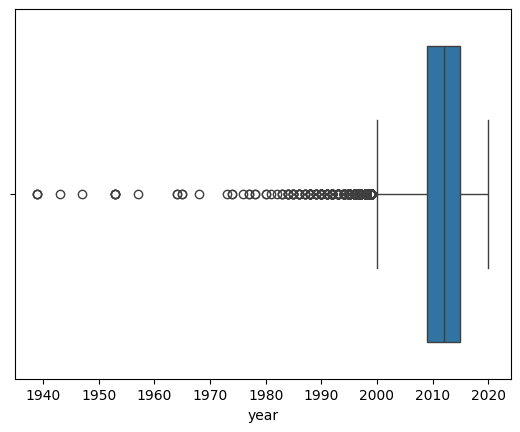

In [20]:
sns.boxplot(x=car['year'])


<Axes: xlabel='Mileage'>

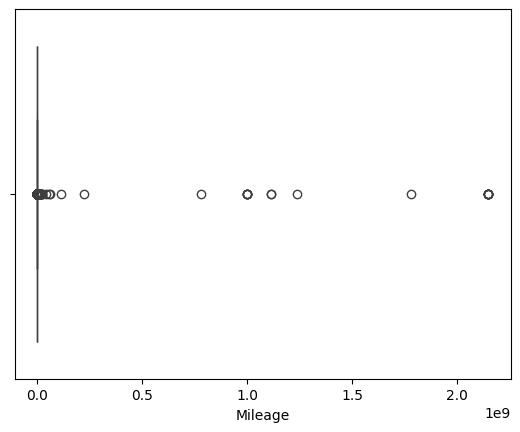

In [21]:
sns.boxplot(x=car['Mileage'])


<Axes: xlabel='Levy'>

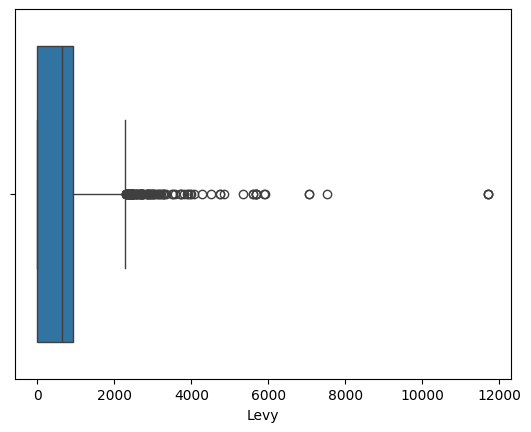

In [22]:
sns.boxplot(x=car['Levy'])


<Axes: xlabel='Doors'>

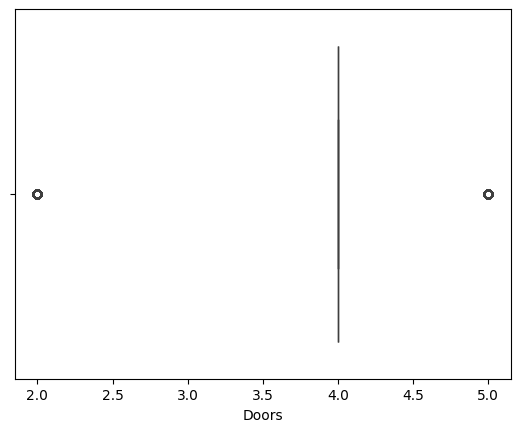

In [23]:
sns.boxplot(x=car['Doors'])

Dari diagram boxplot tersebut tampak data ekstrem ada pada nilai harga. terdapat satu nilai harga yang sangat ekstrem berbeda. oleh karena itu data outlier ini perlu dihapus. Sedangkan data lainnya juga terdapat nilai yang diluar jangkauan atau outlier.

In [24]:
# Melihat mobil dengan harga tertinggi

max_price = car['Price'].max()  # Cari nilai 'Price' tertinggi
highest_price_data = car[car['Price'] == max_price]  # Filter data dengan 'Price' terendah
print(highest_price_data)  # Tampilkan data lengkap

             ID     Price  Levy Manufacturer  Model  year     Category  \
16983  45812886  26307500     0         OPEL  Combo  1999  Goods wagon   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
16983               No    Diesel           1.7    99999          4   

      Gear box type Drive wheels  Doors       Wheel Color  Airbags  
16983        Manual        Front      2  Left wheel  Blue        0  


### Menghapus data outlier

Karena rentang data yang begitu besar maka data outlier akan dihapus.

In [25]:
# Mencari nilai maksimum pada kolom 'Price'
max_price = car['Price'].max()

# Menghapus baris dengan nilai 'Price' sama dengan nilai maksimum
car = car[car['Price'] != max_price]

In [26]:
# menormalkan data dengan menghapus data outlier
# Select only numeric columns for quantile calculation
numeric_car = car.select_dtypes(include=np.number)
Q1 = numeric_car.quantile(0.25)
Q3 = numeric_car.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers based on numeric columns
car = car[~((numeric_car < (Q1 - 1.5 * IQR)) | (numeric_car > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
car.shape

(10515, 18)

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10515 entries, 2 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                10515 non-null  int64 
 1   Price             10515 non-null  int64 
 2   Levy              10515 non-null  int64 
 3   Manufacturer      10515 non-null  object
 4   Model             10515 non-null  object
 5   year              10515 non-null  int64 
 6   Category          10515 non-null  object
 7   Leather interior  10515 non-null  object
 8   Fuel type         10515 non-null  object
 9   Engine volume     10515 non-null  object
 10  Mileage           10515 non-null  int64 
 11  Cylinders         10515 non-null  int64 
 12  Gear box type     10515 non-null  object
 13  Drive wheels      10515 non-null  object
 14  Doors             10515 non-null  int64 
 15  Wheel             10515 non-null  object
 16  Color             10515 non-null  object
 17  Airbags          

Setelah data outlier dihapus, maka jumlah data terbaru adalah 10.515 data.

Berikut adalah visualisasi dari data tersebut.

<Axes: xlabel='Price'>

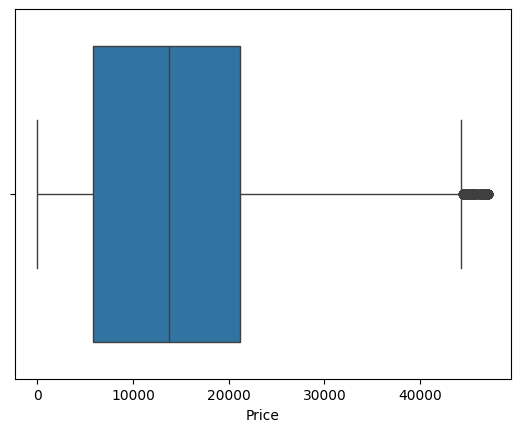

In [29]:
# Cek normalisasi data harga

sns.boxplot(x=car['Price'])

In [30]:
# meiihat dataset dengan urutan harga tertinggi

car_sorted = car.sort_values(by=['Price'], ascending=False)
print(car_sorted)

             ID  Price  Levy Manufacturer    Model  year   Category  \
17974  45804446  47120  1399        LEXUS   RX 350  2010       Jeep   
12252  45804221  47120   694       JAGUAR       XF  2014      Sedan   
9173   45733434  47107   765      HYUNDAI   Sonata  2015      Sedan   
10916  45728530  47076   765    SSANGYONG   REXTON  2015       Jeep   
7685   45729847  47076    87    SSANGYONG   REXTON  2016       Jeep   
...         ...    ...   ...          ...      ...   ...        ...   
14492  45720411      3   697   VOLKSWAGEN    Jetta  2015      Sedan   
4776   45687380      3   810   VOLKSWAGEN    Jetta  2016      Sedan   
8993   45816350      3   595       TOYOTA  Prius C  2015  Hatchback   
13419  45816352      3   503       TOYOTA  Prius C  2012  Hatchback   
16992  45772201      1  1202    CHEVROLET  Lacetti  2006  Hatchback   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
17974              Yes    Petrol           3.5   114382          4   
12252  

Dari data yang ditampilkan maka dapat dihapus nilai extreme dari harga, sedangkan nilai lainnya tidak dihapus supaya tidak menghilangkan makna nilai data.

## Analisa Univariat

Pada bagian ini, akan dilakukan analisa dataset dengan pendekatan Univariat.

In [31]:
# membuat kategori data
numerical_features = ['Price', 'year', 'Mileage', 'Levy', 'Cylinders', 'Doors', 'Airbags']
categorical_features = ['Manufacturer', 'Category', 'Gear box type', 'Drive wheels']

               jumlah sampel  persentase
Manufacturer                            
HYUNDAI                 2933        27.9
TOYOTA                  2300        21.9
CHEVROLET                885         8.4
HONDA                    657         6.2
FORD                     612         5.8
SSANGYONG                417         4.0
NISSAN                   403         3.8
KIA                      329         3.1
MERCEDES-BENZ            328         3.1
VOLKSWAGEN               270         2.6
SUBARU                   213         2.0
LEXUS                    198         1.9
OPEL                     140         1.3
MITSUBISHI               122         1.2
MAZDA                    114         1.1
BMW                      113         1.1
DAEWOO                    90         0.9
AUDI                      89         0.8
JEEP                      67         0.6
SUZUKI                    33         0.3
DODGE                     26         0.2
FIAT                      26         0.2
RENAULT         

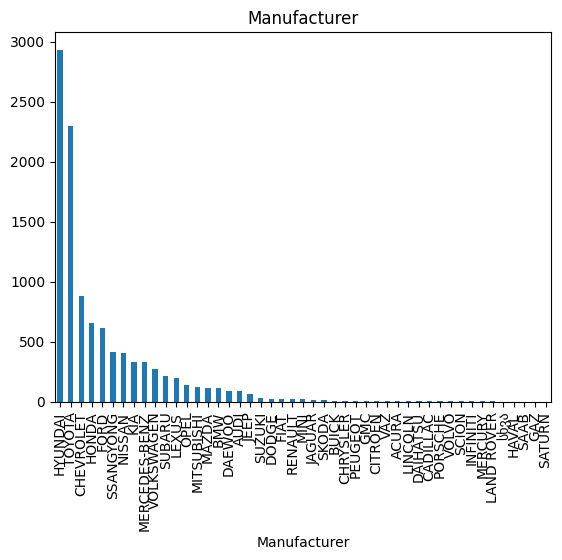

In [32]:
# menampilkan jumlah data sesuai dengan pembuat kendaraan
feature = categorical_features[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari analisa diatas, dapat dipahami bahwa mobil dari pabrikan hyundai, toyota, Chevrolet, Honda, dan Ford merupakan 5 nilai penjualan tertinggi.

             jumlah sampel  persentase
Category                              
Sedan                 5117        48.7
Jeep                  2442        23.2
Hatchback             1983        18.9
Minivan                437         4.2
Universal              259         2.5
Coupe                  109         1.0
Goods wagon             79         0.8
Microbus                74         0.7
Pickup                  14         0.1
Cabriolet                1         0.0


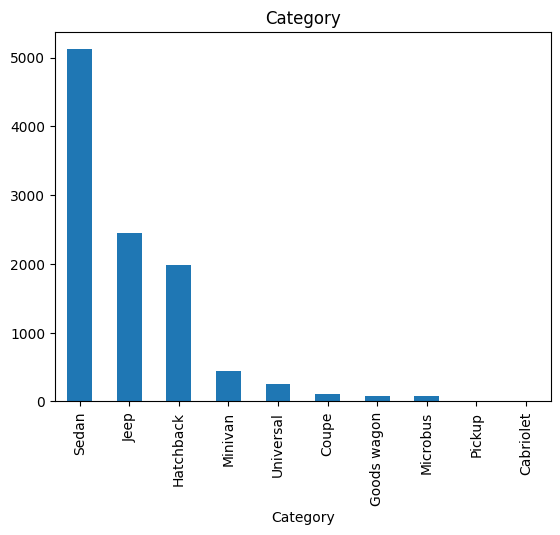

In [33]:
# menampilkan data untuk berdasarkan kategori produk
feature = categorical_features[1]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari grafik diatas, dapat dipahami bahwa mobil dengan tipe sedan merupakan mobil dengan tingkat penjualan tertinggi. disusul jeep dan hatchback

               jumlah sampel  persentase
Gear box type                           
Automatic               8395        79.8
Tiptronic               1075        10.2
Manual                   553         5.3
Variator                 492         4.7


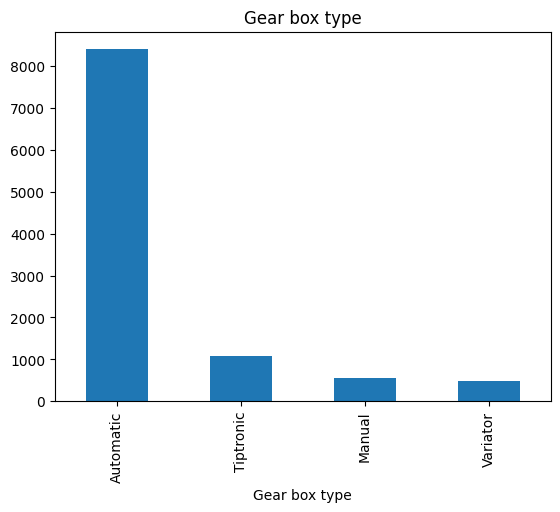

In [34]:
# menampilkan produk berdasarkan gear box
feature = categorical_features[2]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

dari data tersebut dapat dipahami bahwa mobil dengan tipe otomatis merupakan mobil dengan tingkat penjualan tertinggi. sedangkan mobil dengan tipe CVT merupakan mobil dengan tingkat penjualan terendah.

              jumlah sampel  persentase
Drive wheels                           
Front                  9174        87.2
4x4                     923         8.8
Rear                    418         4.0


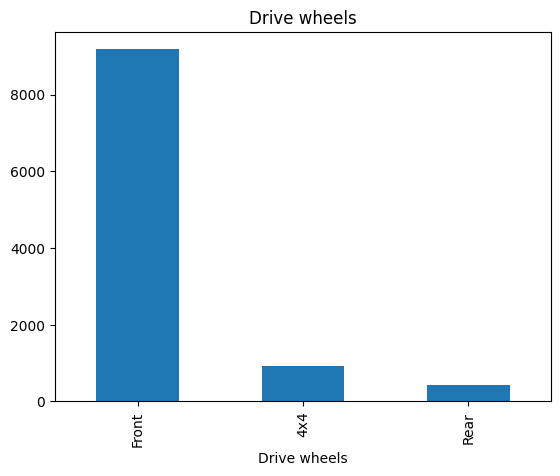

In [35]:
# menampilkan produk berdasarkan  drives wheels
feature = categorical_features[3]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari grafik tersebut menunjukkan bahwa mobil dengan penggerak roda depan memiliki tingkat penjualan tertinggi.

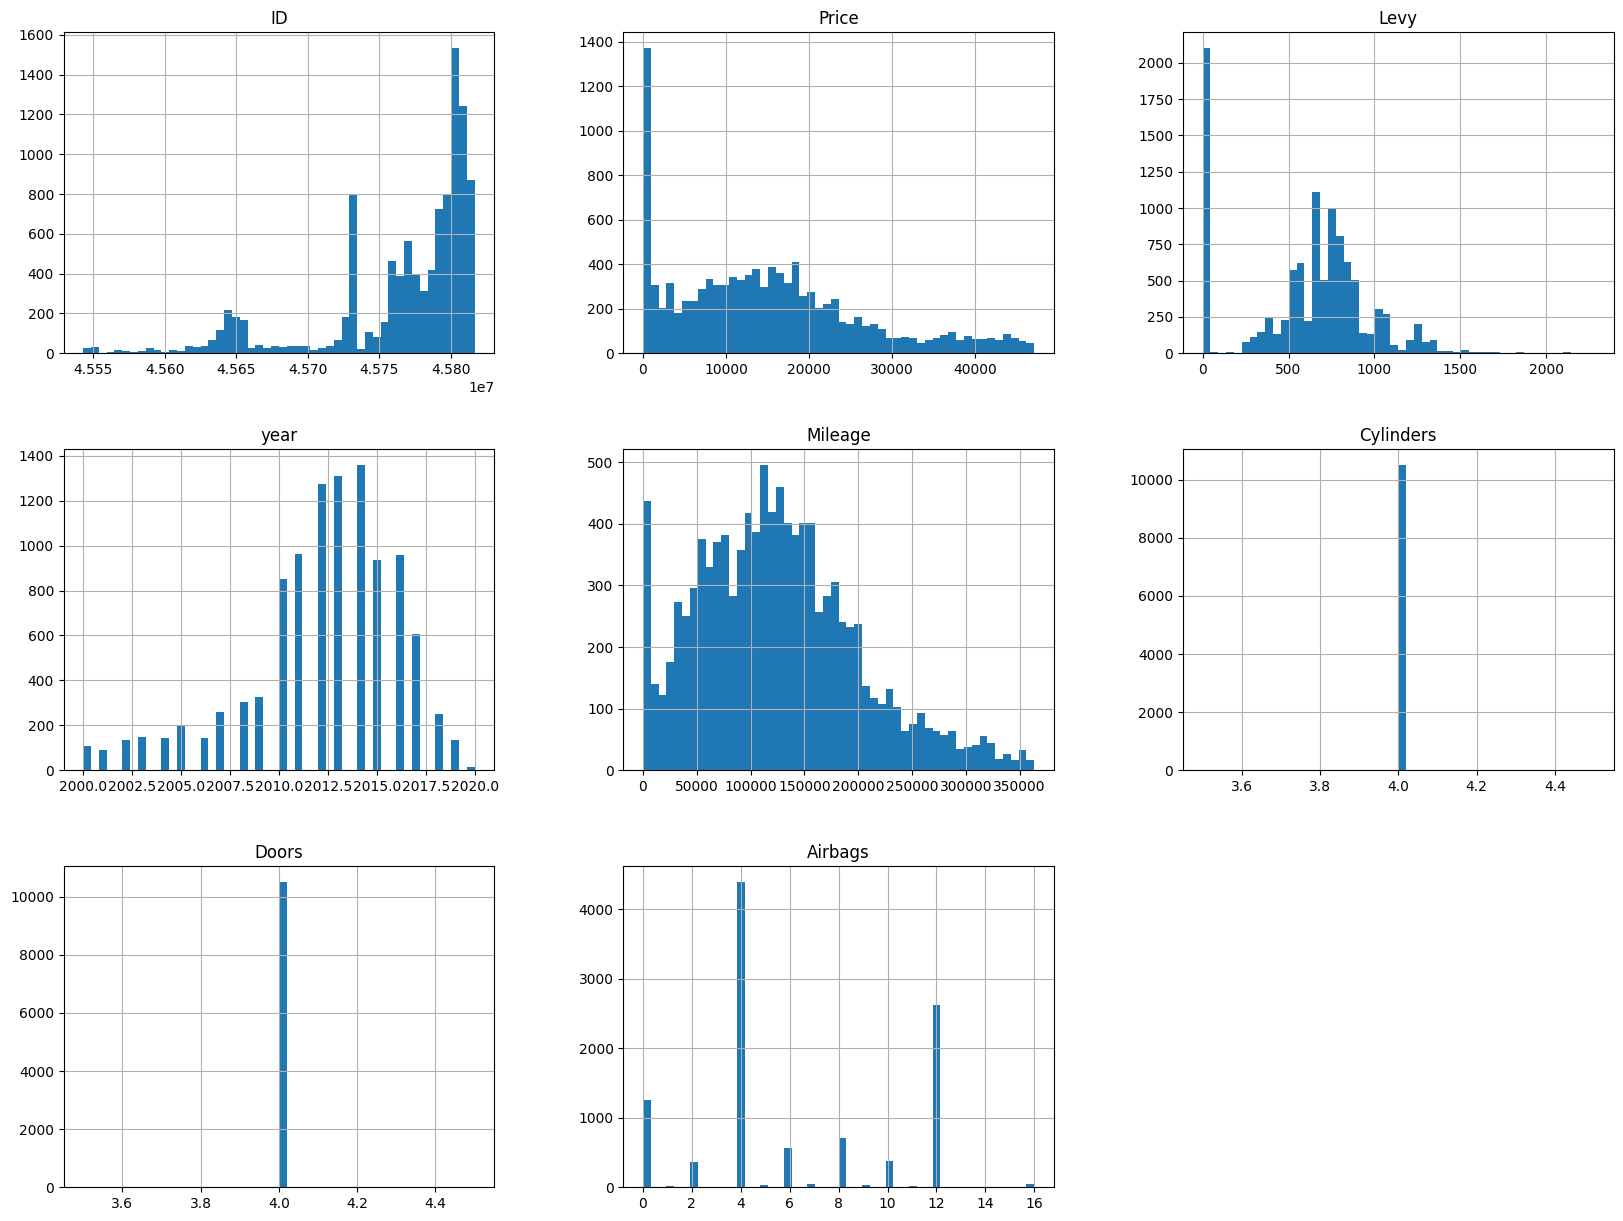

In [36]:
# analisa nilai angka pada data numerik
car.hist(bins=50, figsize=(20,15))
plt.show()

Dari diagram diatas, dapat diketahui bahwa data untuk harga, mileage, year cenderung normal.

# Analisa Multivariat

Pada bagian ini, data akan dikommperasikan terhadap harga.

<ipython-input-37-ee24d4db154e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car, palette="Set3")
<ipython-input-37-ee24d4db154e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car, palette="Set3")
<ipython-input-37-ee24d4db154e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car, palette="Set3")
<ipython-input-37-ee24

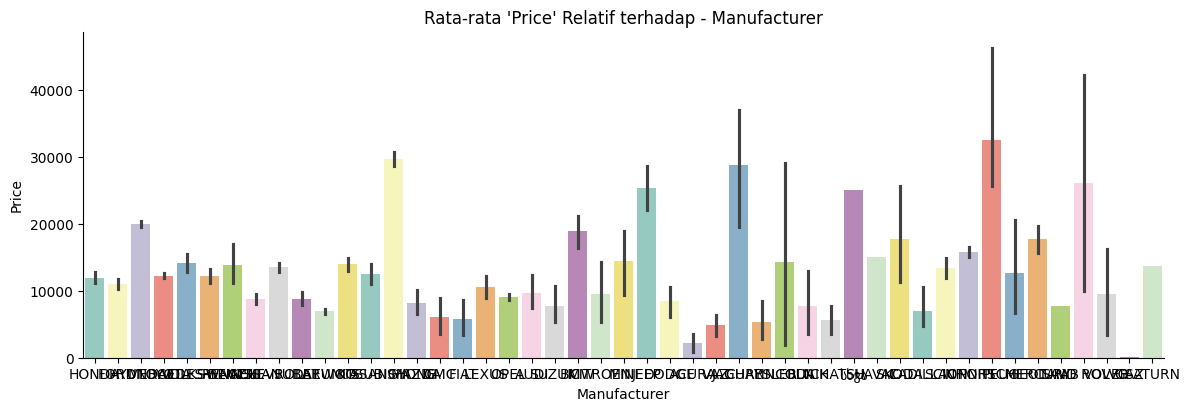

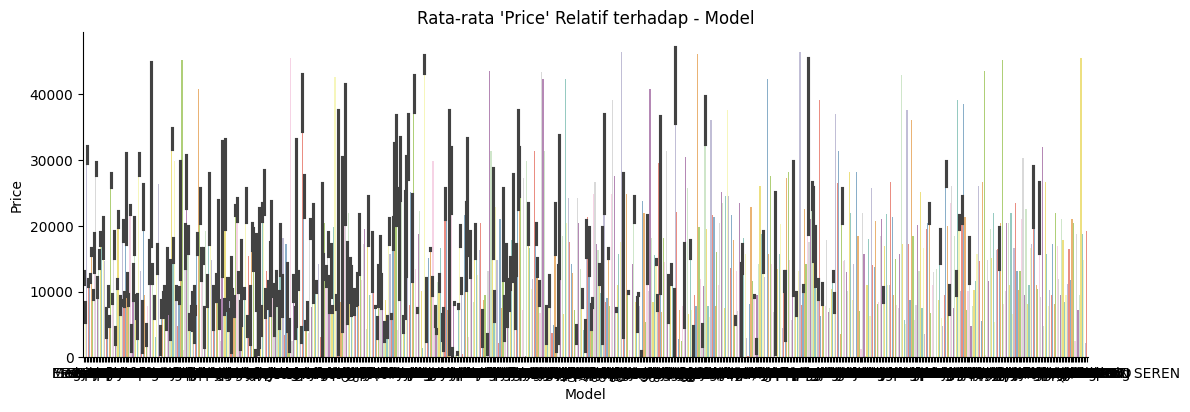

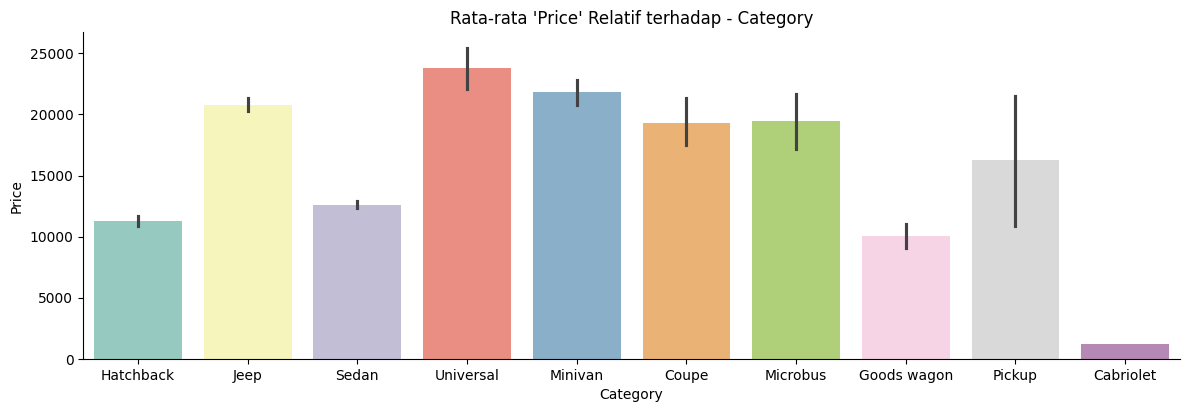

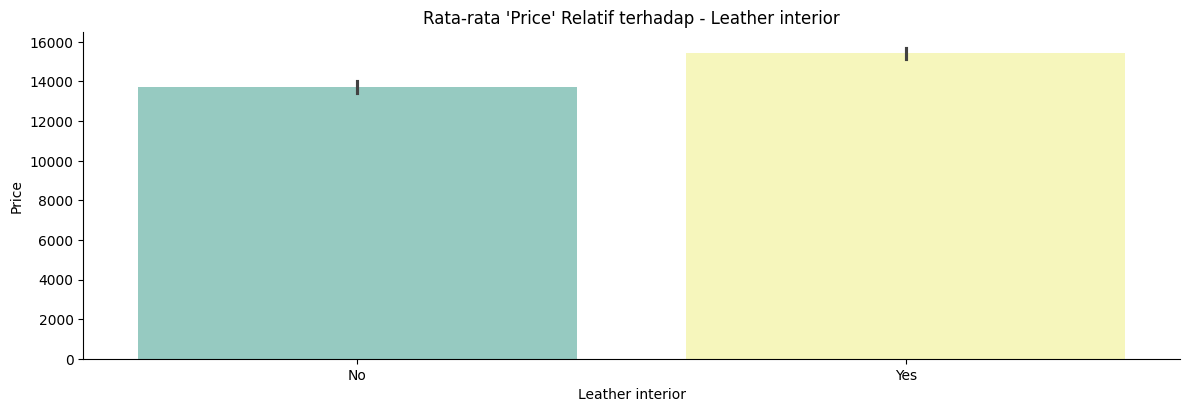

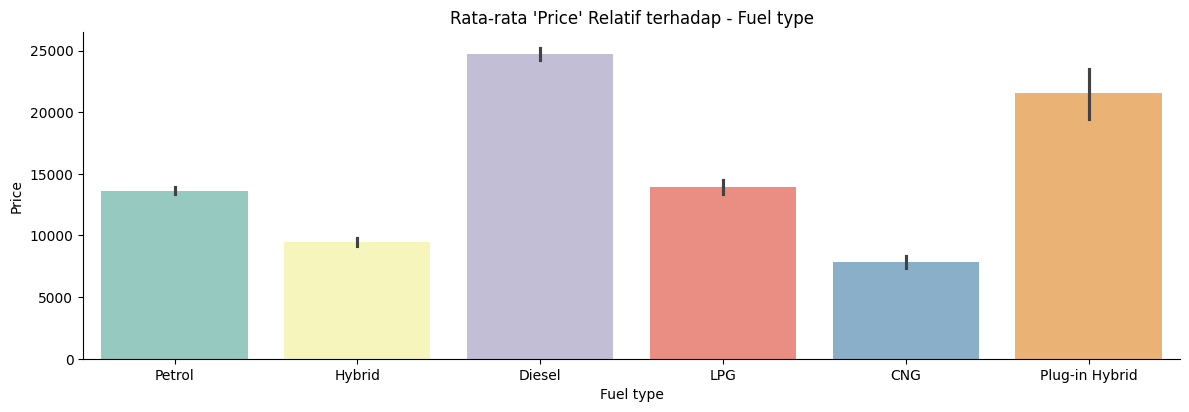

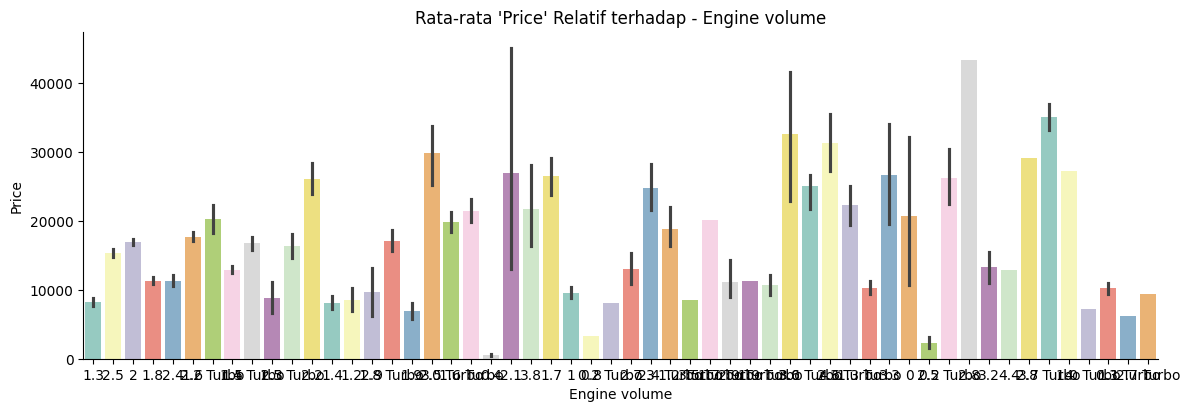

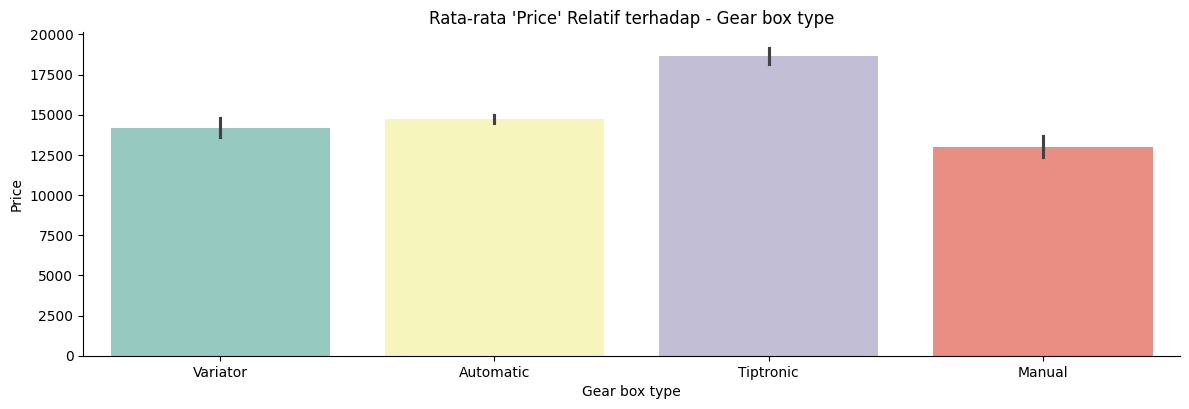

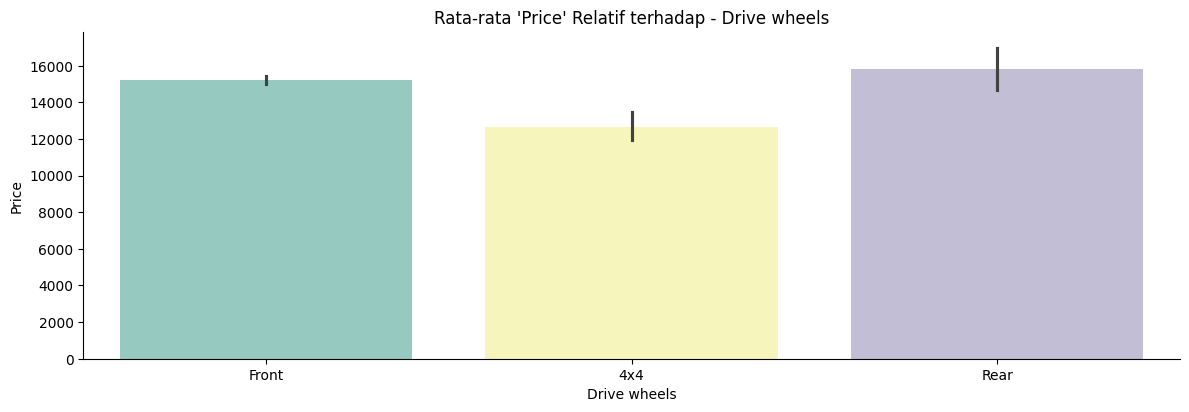

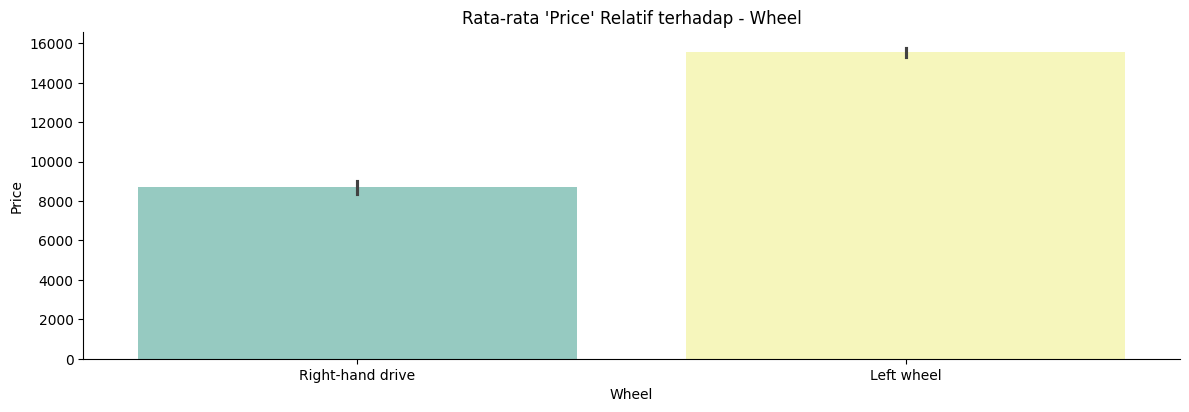

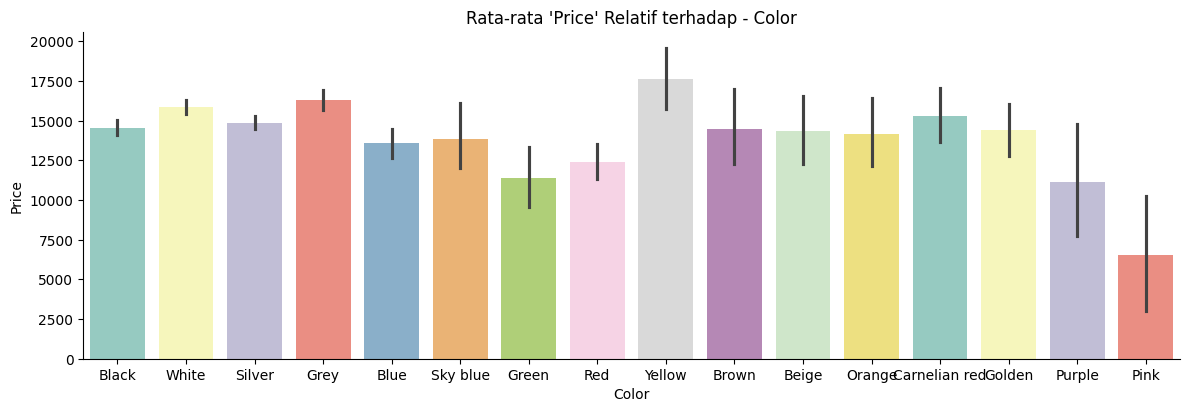

In [37]:
cat_features = car.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Untuk menjawab pertanyaan bisnis 1 dan 2, dari data tersebut dapat dipahami bahwa:
1. mobil dengan warna kuning memiliki rata-rata harga lebih tinggi.
2. mobil dengan kendali roda kiri lebih tinggi harganya dari pada roda kanan.
3. harga mobil dengna mode rear lebih tinggi harnyanya dari tipe mobil, front dan 4x4 wheel drive
4. mobil dengan transmisi triponinc lebih mahal dari pada rata rata harga pite kendaraan lain.
5. mobil dengan interior kulit akan memiliki rata-rata harga leih tinggi dari pada yang tidak kulit.
6. mobil tipe universal memiliki rata-rata harga tertinggi.

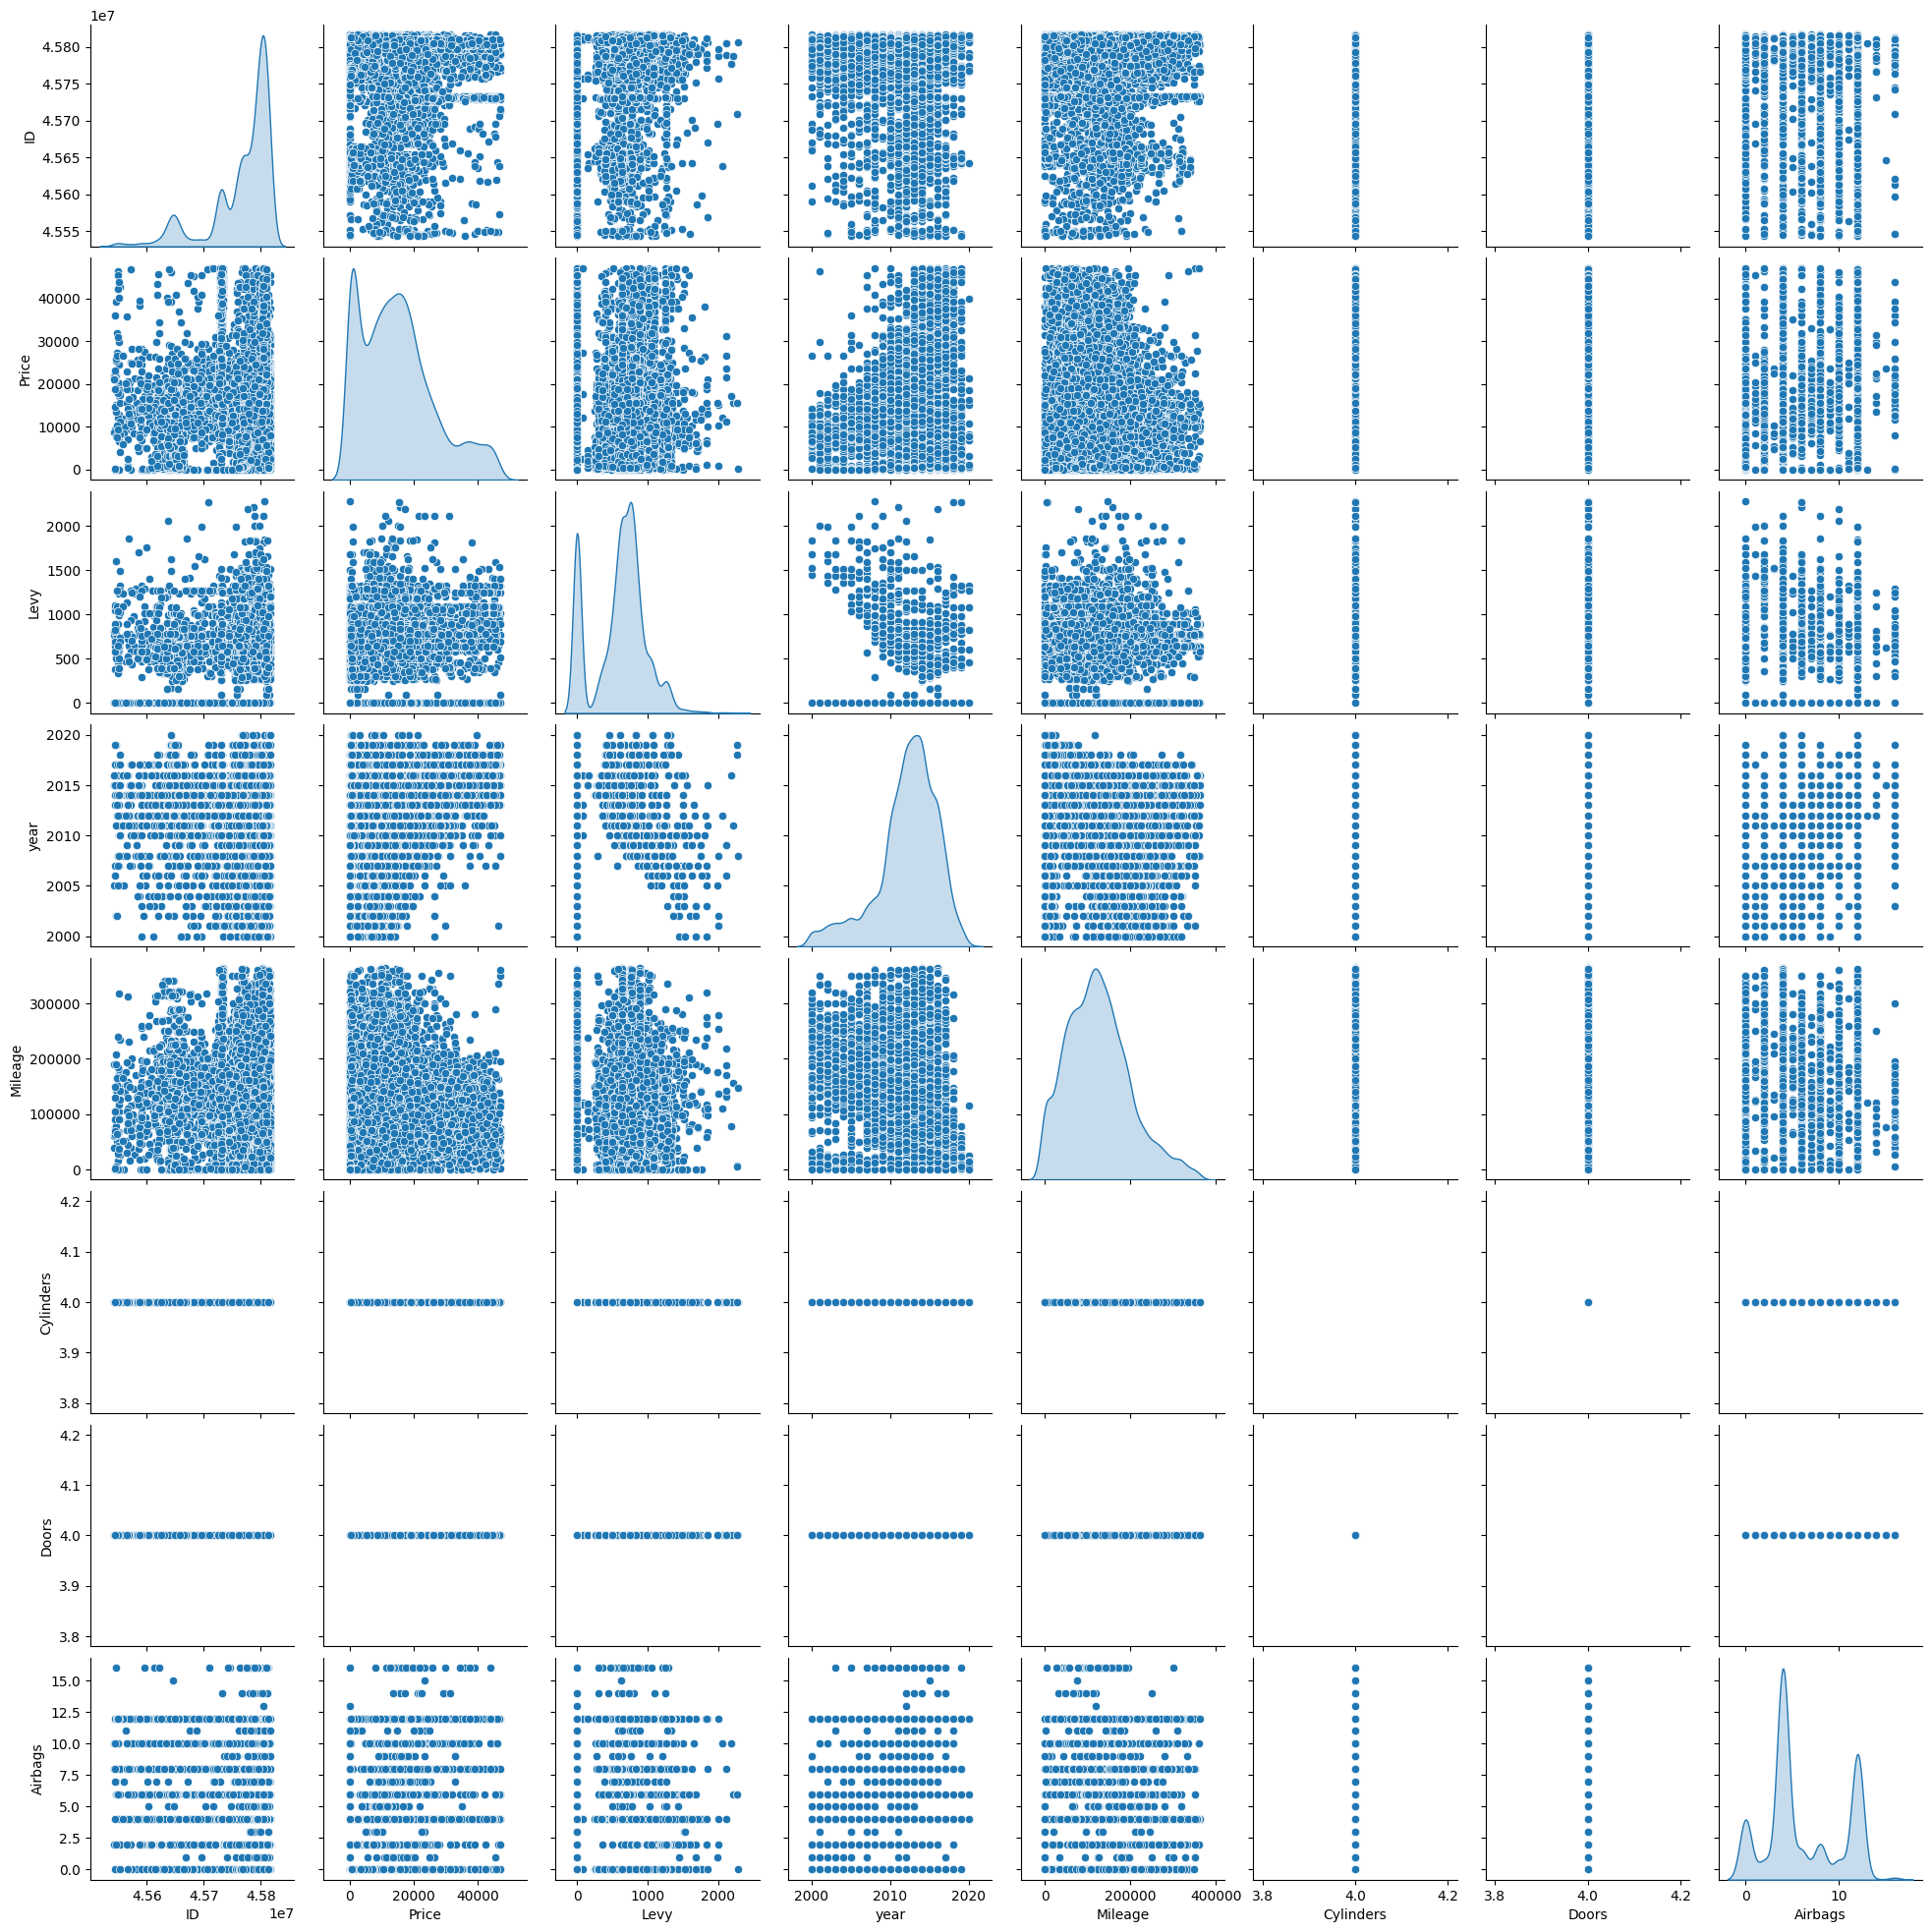

In [38]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(car, diag_kind = 'kde')

Dari diagram tersebut dapat dipahami bahwa secara data numerik tidak ada data yang menunjukkan pengaruh jelas terhadap variabel atau faktor harga.

Oleh karena itu untuk melihat kaitan antara satu hariabel dengan variabel lain maka perlu dilihat korelasinya, sebagai berikut:



Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

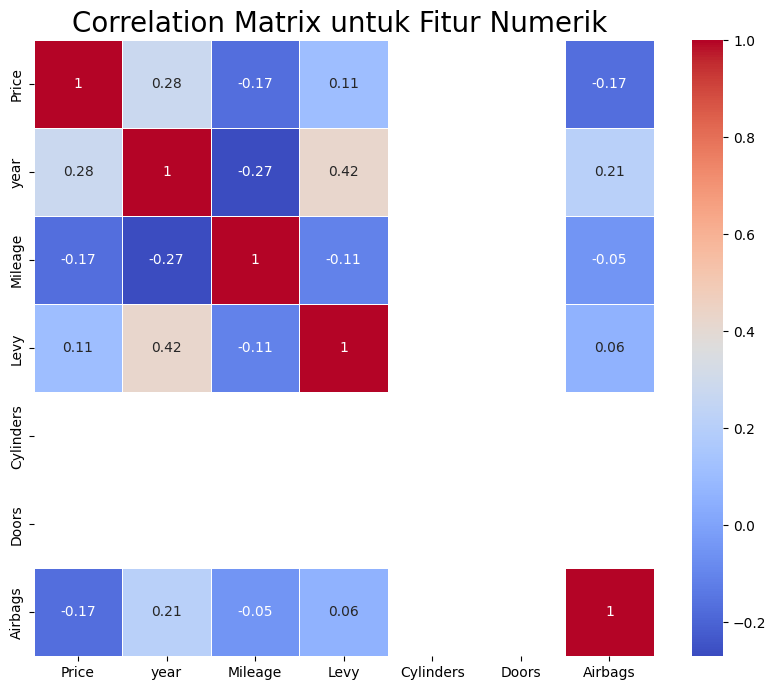

In [39]:
# evaluasi Korelasi atau hubungan

plt.figure(figsize=(10, 8))
correlation_matrix = car[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari analisa heatmap tersebut, dapat dipahami bahwa
1. hanya faktor tahun dan harga yang memiliki hubungan sebesar 0.28. Nilai ini menunjukkan hubungan positif artiknya, semakin baru maka harga bisa semakin tinggi.
2. Variabel harga memiliki hubungan yang negatif terhadap mileage atau jarak. hubungan negatif ini menunjukkan jarak tempuh mobil akan menurunkan harga jualnya.
3. Heatmap juga menunjukkan bahwa ada hubungan antara levy dengan years sebesar 0.4. Hal ini berarti bahwa semakin baru tahun maka pajak akan semakin tinggi, namun nilai tersebut masih rendah karena masih dibawah 0.5

# Encoding Fitur Kategori

In [40]:
from sklearn.preprocessing import  OneHotEncoder
car = pd.concat([car, pd.get_dummies(car['Manufacturer'], prefix='Manufacturer')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Category'], prefix='Category')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Gear box type'], prefix='Gear box type')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Drive wheels'], prefix='Drive wheels')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Model'], prefix='Model')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Color'], prefix='Color')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Leather interior'], prefix='Leather interior')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Fuel type'], prefix='Fuel type')],axis=1)
car.drop(['Manufacturer','Category','Gear box type', 'Drive wheels', 'Model', 'Color','Leather interior', 'Fuel type', 'Wheel', 'Engine volume'], axis=1, inplace=True)
car.head()

,ID,Price,Levy,year,Mileage,Cylinders,Doors,Airbags,Manufacturer_ACURA,Manufacturer_AUDI,...,Color_White,Color_Yellow,Leather interior_No,Leather interior_Yes,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
2,45774419,8467,0,2006,200000,4,4,2,False,False,...,False,False,True,False,False,False,False,False,True,False
3,45769185,3607,862,2011,168966,4,4,0,False,False,...,True,False,False,True,False,False,True,False,False,False
4,45809263,11726,446,2014,91901,4,4,4,False,False,...,False,False,False,True,False,False,False,False,True,False
5,45802912,39493,891,2016,160931,4,4,4,False,False,...,True,False,False,True,False,True,False,False,False,False
6,45656768,1803,761,2010,258909,4,4,12,False,False,...,True,False,False,True,False,False,True,False,False,False


In [41]:
# Mengubah nilai boolean menjadi integer (0 dan 1)
for column in car.select_dtypes(include=['bool']).columns:
    car[column] = car[column].astype(int)

In [42]:
car.head()

,ID,Price,Levy,year,Mileage,Cylinders,Doors,Airbags,Manufacturer_ACURA,Manufacturer_AUDI,...,Color_White,Color_Yellow,Leather interior_No,Leather interior_Yes,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
2,45774419,8467,0,2006,200000,4,4,2,0,0,...,0,0,1,0,0,0,0,0,1,0
3,45769185,3607,862,2011,168966,4,4,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,45809263,11726,446,2014,91901,4,4,4,0,0,...,0,0,0,1,0,0,0,0,1,0
5,45802912,39493,891,2016,160931,4,4,4,0,0,...,1,0,0,1,0,1,0,0,0,0
6,45656768,1803,761,2010,258909,4,4,12,0,0,...,1,0,0,1,0,0,1,0,0,0


# Uji Regresi

/dari hasil analisa pairplot dan heatmap yang dilakukan maka dapat diperoleh informasi bahwa hanya faktor tahun yang memiliki nilai korelasi lebih dari 0.2, yaitu 0.28. Dengan demikian hanya variabel tahun saja yang dapat menjelaskan harga dengan lebih baik dari pada variabel lain.

Oleh karena itu, prediksi akan dilakukan hanya pada variabel tahun terhadap harga.

Berikut ini adalah gambaran regresinya untuk melihat arah regresinya.


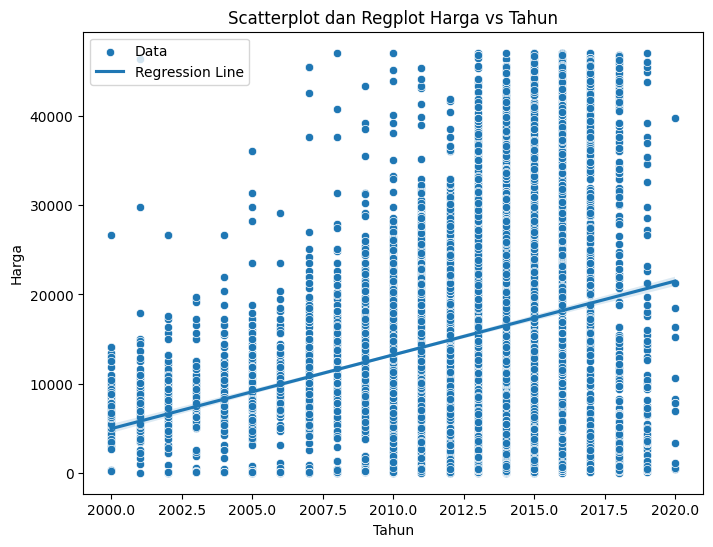

In [43]:
# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatterplot
sns.scatterplot(x='year', y='Price', data=car, ax=ax, label='Data')

# Regplot
sns.regplot(x='year', y='Price', data=car, ax=ax, scatter=False, label='Regression Line')  # scatter=False untuk menghindari plot titik dua kali

# Atur judul, label sumbu, dan legenda
plt.title('Scatterplot dan Regplot Harga vs Tahun')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()

# Tampilkan plot
plt.show()

Hasil plot tersebut menunjukkan menunjukkan arah positif yang menunjukkan semkin baru tahun maka harga akn cenderung lebih mahal.
Untuk mendukung hal itu maka regresi dapat dilakukan sebagai berikut

In [44]:
import statsmodels.formula.api as smf
model = smf.ols('Price ~ year', data=car).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     864.0
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.39e-182
Time:                        12:03:18   Log-Likelihood:            -1.1289e+05
No. Observations:               10515   AIC:                         2.258e+05
Df Residuals:                   10513   BIC:                         2.258e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.65e+06   5.66e+04    -29.129      0.0

Hasil regresi tersebut menunjukkan bahwa nilai P sebesar 0.000 yang artinya terbukti bahwa semakin baru tahun mobil maka harga semakin tinggi, dengan nilai koefisien 827.54. yang menunjukkan kenaikan harga sebesar 827.54 untuk tahun kendaraan yang lebih baru.

# Standarisasi

Selanjutnya kita akan melihat seberapa tepat akurasi prediksi tahun terhadap harga dengan melakukan standarisasi nilai.

In [45]:
    from sklearn.model_selection import train_test_split

    X = car.drop(["Price"],axis =1)
    y = car["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [46]:
    from sklearn.preprocessing import StandardScaler

    numerical_features = ['year']
    scaler = StandardScaler()
    scaler.fit(X_train[numerical_features])
    X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
    X_train[numerical_features].head()

,year
6593,0.735571
6972,1.254022
16386,-0.560554
3284,1.254022
8848,0.735571


In [47]:
    X_train[numerical_features].describe().round(4)

,year
count,9463.0000
mean,-0.0000
std,1.0001
min,-3.1528
25%,-0.5606
50%,0.2171
75%,0.7356
max,2.0317


# Pembuatan Model

## KNN

In [48]:
    # Siapkan dataframe untuk analisis model
    models = pd.DataFrame(index=['train_mse', 'test_mse'],
                          columns=['KNN', 'RandomForest', 'Boosting'])

In [49]:
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error

    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train, y_train)

    models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [50]:
    # Impor library yang dibutuhkan
    from sklearn.ensemble import RandomForestRegressor

    # buat model prediksi
    RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
    RF.fit(X_train, y_train)

    models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Boosting Algorithm

In [51]:
    from sklearn.ensemble import AdaBoostRegressor

    boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
    boosting.fit(X_train, y_train)
    models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

In [52]:
    # Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
    X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-52-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.25402169 -0.04210388 -0.81977922 ... -0.30132899  0.21712124
  0.47634635]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


In [53]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,68211.830462,81260.940738
RF,8727.114406,23225.015087
Boosting,73626.970477,76027.696185


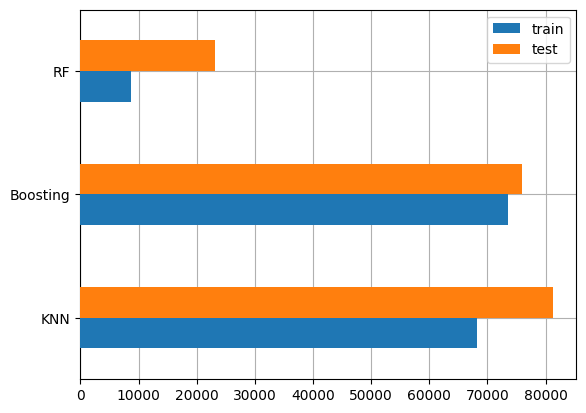

In [54]:
    fig, ax = plt.subplots()
    mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
    ax.grid(zorder=0)

In [55]:
    prediksi = X_test.iloc[:1].copy()
    pred_dict = {'y_true':y_test[:1]}
    for name, model in model_dict.items():
        pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

    pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
398,40769,27158.4,32381.8,17779.6


### Kesimpulan

Dari hasil tersebut uji model tersebut, model menggunakan Random Forest menunjukkan eror yang lebih sedikit dari pada nilai KNN dan Boosting.

Hasil ini menunjukkan nilai prediksi RF 32381.8 yang berarti 79.43% akurasi prediksi tersebut.

Pada bagian akhir ini, jawaban atas pertanyaan bisnis adalah sebagaiberikut:
1. Faktor yang mempredikisi harga mobil adalah faktor tahun yang ditunjukkan dengan korelasi atau hubungan yang paling kuat diantara faktor lain.
Dengan demikiansemakin baru tahun kendaraan maka harga akan mengalami peningkatan.
2. Faktor harga dapat memprediksi sebesar 79.54% peningkatan harga mobil.